<a href="https://colab.research.google.com/github/tylershienlim/fcc-linear-regression/blob/main/FreeCodeCamp_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-11-24 08:24:39--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2022-11-24 08:24:39 (3.91 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


#My Code

In [ ]:
dataset["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
dataset["sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
dataset["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dataset["sex"].replace(["female", "male"], 
                       [0, 1], inplace=True)
dataset["smoker"].replace(["yes", "no"],
                          [1, 0], inplace=True)
dataset["region"].replace(['southwest', 'southeast', 'northwest', 'northeast'],
                          [0, 1, 2, 3], inplace=True)

dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,0,2,10600.55
1334,18,0,31.9,0,0,3,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,0,2007.95
1337,61,0,29.1,0,1,2,29141.36


In [ ]:
train_dataset = dataset.sample(frac=0.8)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

model = tf.keras.Sequential(
    [normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1)]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 16)                112       
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198
Trainable params: 185
Non-trainable params: 13
_______________________________________________________

In [ ]:
model.predict(train_dataset[:10])

1/1 [==============================] - 0s 74ms/step


array([[ 0.7450088 ],
       [-0.36739704],
       [ 0.35588914],
       [-0.08901605],
       [-0.5733286 ],
       [-0.5602472 ],
       [ 0.08534071],
       [ 0.35118583],
       [ 1.041856  ],
       [-0.10409329]], dtype=float32)

In [ ]:
model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

#FCC Code

9/9 - 0s - loss: 3383.8572 - mae: 3383.8572 - mse: 40208148.0000 - 43ms/epoch - 5ms/step
Testing set Mean Abs Error: 3383.86 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


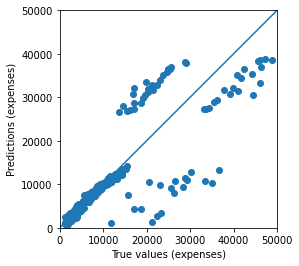

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
